<a href="https://colab.research.google.com/github/moqri/gene-regulatory-network/blob/master/Yeast_TF_Induction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!wget -O expression.zip -nc https://storage.googleapis.com/calico-website-pin-public-bucket/datasets/idea_wide_format_data.zip
!unzip -n expression.zip 
path_to_expression='idea_wide_format_data/idea_wide_format_data.txt'

File ‘expression.zip’ already there; not retrieving.
Archive:  expression.zip


In [0]:
import pandas as pd

In [29]:
expression_df=pd.read_table(path_to_expression,index_col=0)
expression_df=expression_df.drop(expression_df.columns[0],1)
expression_df.shape

(6175, 1692)

In [151]:
df=expression_df.iloc[:,29:36]
df['s']=df.sum(1)
df.head()

,AFT1_SMY54_01/01/2015_P_GEV_0.0_log2_shrunken_timecourses,AFT1_SMY54_01/01/2015_P_GEV_05.0_log2_shrunken_timecourses,AFT1_SMY54_01/01/2015_P_GEV_15.0_log2_shrunken_timecourses,AFT1_SMY54_01/01/2015_P_GEV_30.0_log2_shrunken_timecourses,AFT1_SMY54_01/01/2015_P_GEV_45.0_log2_shrunken_timecourses,AFT1_SMY54_01/01/2015_P_GEV_60.0_log2_shrunken_timecourses,AFT1_SMY54_01/01/2015_P_GEV_90.0_log2_shrunken_timecourses,s
GENE,,,,,,,,
AAC1,0,0.0,0.0,-0.907243,-0.792311,-0.900212,-0.924378,-3.524144
AAC3,0,0.0,0.0,-0.018596,0.000000,0.399531,0.814581,1.195517
AAD10,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AAD14,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AAD15,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


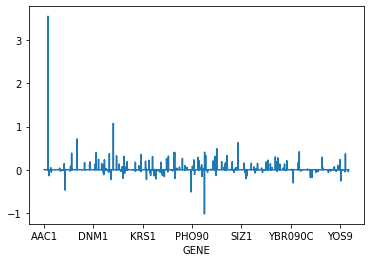

In [152]:
df.iloc[:,1].plot()

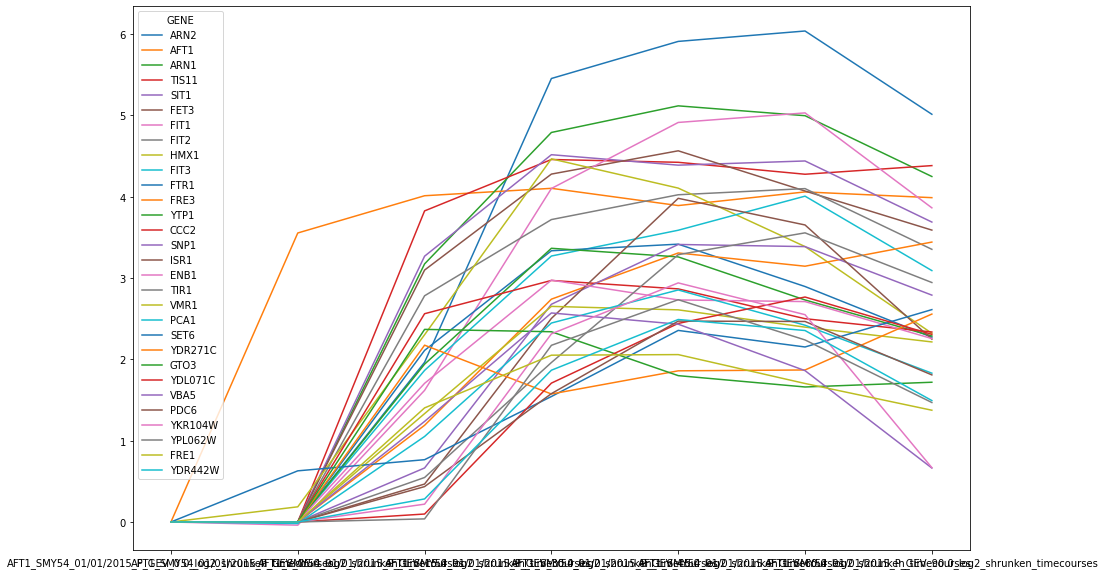

In [153]:
df[df.s>0].sort_values('s',ascending=False).iloc[:,:-1].head(30).transpose().plot(figsize=(15,10))

In [0]:
cols=expression_df.columns
tfs=set([c[:4] for c in cols])
with open('tfs.txt', 'w') as filehandle:
    for tf in tfs:
        filehandle.write('%s\n' % tf)